# Structured Low-Rank Reconstruction with Submatrix Constraints - GRE

In [2]:
import numpy as np
import skimage
import SLR
import matplotlib.pyplot as plt
import utils
import h5py

%load_ext autoreload
%autoreload 2
%matplotlib inline

## Load Data

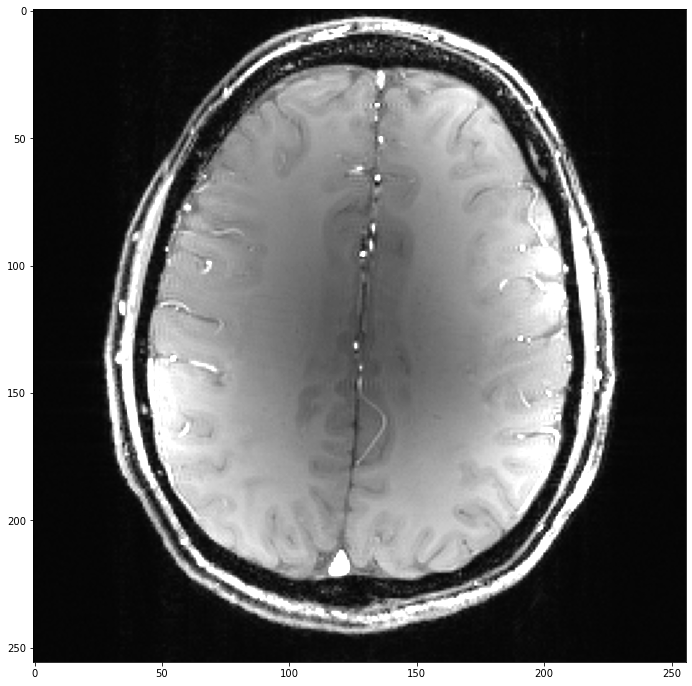

In [3]:
g = np.load('../data/gre.npy')
# print(g.shape[1])

_, ax = plt.subplots(figsize=(12,12))
ax.imshow(utils.sos(np.abs(g[:,:,:,10,0]), axis=1).T[::-1,:], vmin=0, vmax=1E-6, cmap='gray')

## Compress Coils and Downsample

(128, 128, 4)


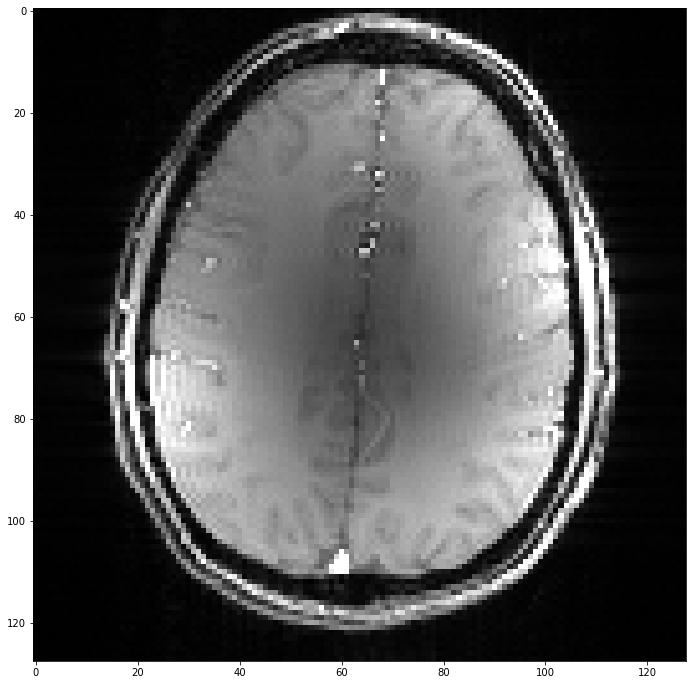

In [5]:
_, V = utils.half_SVD(g[:,:,:,10,0].transpose((0,2,1)).reshape((-1,32)))

nc = 4
pg = utils.fftdim(g[:,:,:,10,0], dims=(0,2))[64:192,:,64:192].transpose((0,2,1)).reshape((-1,32))@V[:,:nc]
pg = np.reshape(pg,(128,128,nc))

_, ax = plt.subplots(figsize=(12,12))
ax.imshow(utils.sos(utils.ifftdim(pg, dims=(0,1)), axis=2).T[::-1,:], vmin=0, vmax=2E-6, cmap='gray')
print(pg.shape)

In [9]:
def rmse(x):
    return np.linalg.norm(pg.ravel()-x.ravel())/np.linalg.norm(pg.ravel())

## Define Sampling mask

Under-sampling ratio: 0.3828125


Text(0.5, 1.0, 'iFFT')

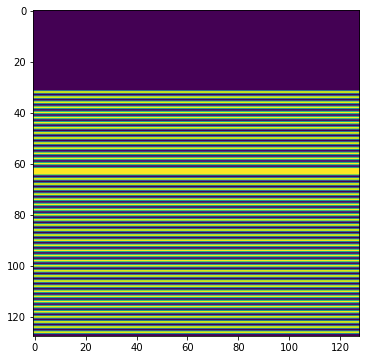

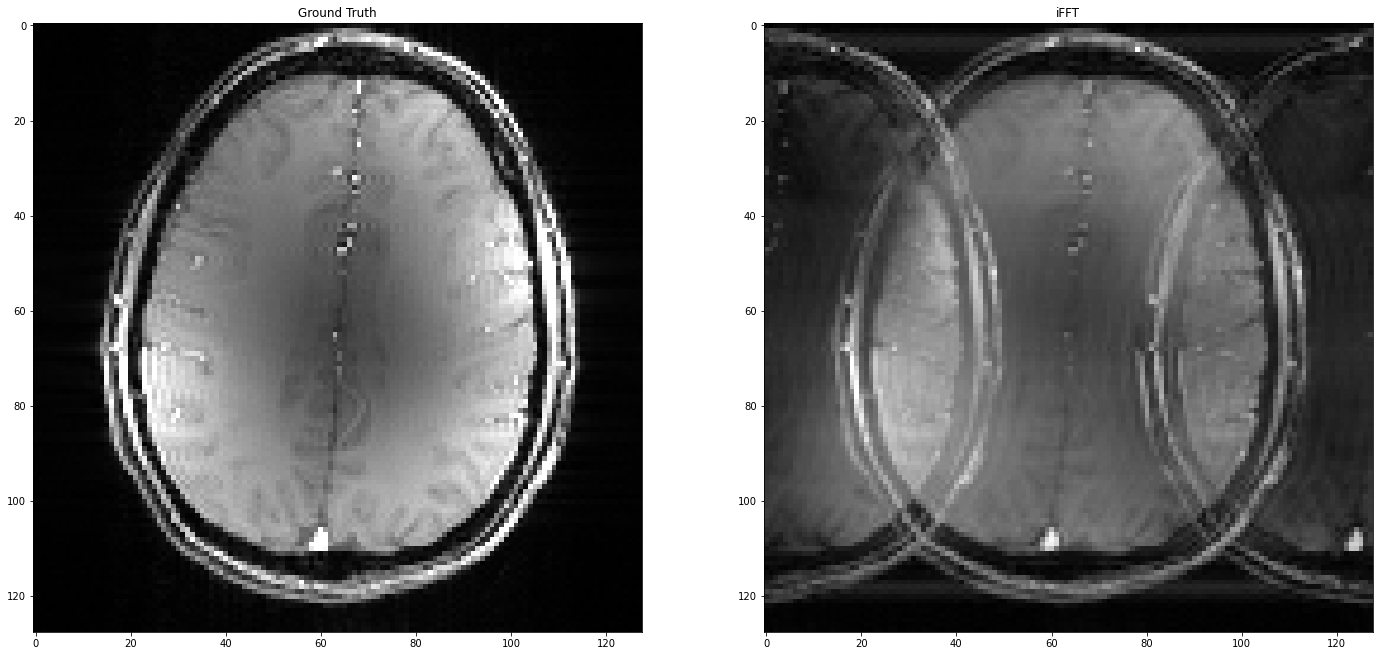

In [ ]:
# Partial Fourier sampling 0.75
mask2 = np.zeros((128,128))
# mask2[:32,:]=0
mask2[::2,:] = 1
mask2[:32,:]=0
mask2[63:64,:] = True
print(f'Under-sampling ratio: {np.count_nonzero(mask2)/128**2}')

fg2 = pg*mask2[:,:,np.newaxis]

# Plot sampling mask
_, ax = plt.subplots(figsize=(6,6))
ax.imshow(mask2)
# print(fg.shape)


_, ax = plt.subplots(1,2, figsize=(24,24))

# ax[0].imshow(np.abs(utils.ifftdim(pg, dims=(0,1))))
ax[0].imshow(utils.sos(utils.ifftdim(pg, dims=(0,1)), axis=2).T[::-1,:], vmin=0, vmax=2E-6, cmap='gray')
ax[0].set_title('Ground Truth')
ax[1].imshow(utils.sos(utils.ifftdim(fg2, dims=(0,1)), axis=2).T[::-1,:], vmin=0, vmax=2E-6, cmap='gray')
ax[1].set_title('iFFT')

In [ ]:
r = 110

zz110 = SLR.ADMM(fg2, SLR.vcc_matrix, (5,5), r, batch=SLR.sub_blockfix(1), p=1E-4, niters=1500, init=None, gt=pg,tol=1E-3)
print(f'Rank: {r}, Full Matrix, RMSE: {rmse(zz110[0])}')

NameError: name 'SLR' is not defined

In [10]:
print(f'Rank: {r}, Full Matrix, RMSE: {rmse(zz110[0])}')

Rank: 110, Full Matrix, RMSE: 0.12644410992824368


In [198]:
r = 105

zz105 = SLR.ADMM(fg2, SLR.vcc_matrix, (5,5), r, batch=SLR.sub_blockfix(1), p=1E-4, niters=1500, init=None, gt=pg,tol=1E-3)
print(f'Rank: {r}, Full Matrix, RMSE: {rmse(zz105[0])}')

Iter: 0, RMSE: 0.6123432040884584
Iter: 100, RMSE: 0.42794798327916755
Iter: 200, RMSE: 0.3192250908235778
Iter: 300, RMSE: 0.24437906678668156
Iter: 400, RMSE: 0.19145262211500083
Iter: 500, RMSE: 0.15415718584809743
Iter: 600, RMSE: 0.13368550259010117
Iter: 700, RMSE: 0.1278292428333517
Iter: 800, RMSE: 0.1266316932331019
Iter: 900, RMSE: 0.12660965610150685
Iter: 1000, RMSE: 0.12692331635998097
Iter: 1100, RMSE: 0.1273103878421244
Iter: 1200, RMSE: 0.12768626651302073
Iter: 1300, RMSE: 0.1280735245819409
Iter: 1400, RMSE: 0.12845807413917887
Rank: 105, Full Matrix, RMSE: 0.1288078384827275


In [199]:
r = 115

zz110 = SLR.ADMM(fg2, SLR.vcc_matrix, (5,5), r, batch=SLR.sub_blockfix(1), p=1E-4, niters=1500, init=None, gt=pg,tol=1E-3)
print(f'Rank: {r}, Full Matrix, RMSE: {rmse(zz110[0])}')

Iter: 0, RMSE: 0.6123432040884584
Iter: 100, RMSE: 0.5015733868365256
Iter: 200, RMSE: 0.4379465561684254
Iter: 300, RMSE: 0.3825751892322549
Iter: 400, RMSE: 0.331003190926087
Iter: 500, RMSE: 0.2914085186303521
Iter: 600, RMSE: 0.263264758447112
Iter: 700, RMSE: 0.24113238268496734
Iter: 800, RMSE: 0.22190928565176518
Iter: 900, RMSE: 0.20472242376147032
Iter: 1000, RMSE: 0.18858843101106007
Iter: 1100, RMSE: 0.1737136355174642
Iter: 1200, RMSE: 0.1590621718221012
Iter: 1300, RMSE: 0.14652701672233936
Iter: 1400, RMSE: 0.1354649868388565
Rank: 115, Full Matrix, RMSE: 0.12923637589796144


In [200]:
for r in np.arange(100,130,5):
    x2 = SLR.ADMM(fg2, SLR.vcc_matrix, (5,5), r, batch=SLR.sub_block(2), p=1E-4, niters=1500, init=None, gt=pg)
    print(f'Rank: {r}, Batch Size (Block): {2}, RMSE: {rmse(x2[0])}')

Iter: 0, RMSE: 0.6123432040884584
Iter: 100, RMSE: 0.4152307259671781
Iter: 200, RMSE: 0.2940895054511679
Iter: 300, RMSE: 0.20851815958955075
Iter: 400, RMSE: 0.15297152699677996
Iter: 500, RMSE: 0.11916043907090135
Iter: 600, RMSE: 0.10957157445228627
Iter: 700, RMSE: 0.10805493882582869
Iter: 800, RMSE: 0.10813529953167456
Iter: 900, RMSE: 0.10836345245096068
Iter: 1000, RMSE: 0.10835022401485961
Iter: 1100, RMSE: 0.1085015389550433
Iter: 1200, RMSE: 0.10917130591121713
Iter: 1300, RMSE: 0.10954674002547393
Iter: 1400, RMSE: 0.10990654865228801
Rank: 100, Batch Size (Block): 2, RMSE: 0.1099926584793292
Iter: 0, RMSE: 0.6123432040884584
Iter: 100, RMSE: 0.46768207674530565
Iter: 200, RMSE: 0.3773860528449679
Iter: 300, RMSE: 0.2936359355016367
Iter: 400, RMSE: 0.23447132863475395
Iter: 500, RMSE: 0.19071762997109587
Iter: 600, RMSE: 0.15466198495299147
Iter: 700, RMSE: 0.12648246803954336
Iter: 800, RMSE: 0.11249897601663064
Iter: 900, RMSE: 0.10846498130600564
Iter: 1000, RMSE: 0.10

KeyboardInterrupt: 

In [11]:
r=110
xx2_110 = SLR.ADMM(fg2, SLR.vcc_matrix, (5,5), r, batch=SLR.sub_block(2), p=1E-4, niters=1500, init=None, gt=pg)
print(f'Rank: {r}, Batch Size (Block): {2}, RMSE: {rmse(xx2_110[0])}')

Iter: 0, RMSE: 0.6123432040884584
Iter: 100, RMSE: 0.49147162919126797
Iter: 200, RMSE: 0.41964763383550774
Iter: 300, RMSE: 0.3535063098549025
Iter: 400, RMSE: 0.2926426590080771
Iter: 500, RMSE: 0.24470688262764856
Iter: 600, RMSE: 0.2081649874818049
Iter: 700, RMSE: 0.1793320682826857
Iter: 800, RMSE: 0.15660957996741043
Iter: 900, RMSE: 0.13714772743701686
Iter: 1000, RMSE: 0.12078853399766763
Iter: 1100, RMSE: 0.11183974450428033
Iter: 1200, RMSE: 0.10804902685940036
Iter: 1300, RMSE: 0.10661246388959007
Iter: 1400, RMSE: 0.10607883565602051
Rank: 110, Batch Size (Block): 2, RMSE: 0.10592258624364963


In [12]:
r=110
xx4_110 = SLR.ADMM(fg2, SLR.vcc_matrix, (5,5), r, batch=SLR.sub_block(4), p=1E-4, niters=1500, init=None, gt=pg)
print(f'Rank: {r}, Batch Size (Block): {4}, RMSE: {rmse(xx4_110[0])}')

Iter: 0, RMSE: 0.6123432040884584
Iter: 100, RMSE: 0.5111044282514792
Iter: 200, RMSE: 0.44804497592467984
Iter: 300, RMSE: 0.3937811036094541
Iter: 400, RMSE: 0.33971043234357207
Iter: 500, RMSE: 0.2882005938578931
Iter: 600, RMSE: 0.24431843175635706
Iter: 700, RMSE: 0.21164886029766453
Iter: 800, RMSE: 0.19019717219763127
Iter: 900, RMSE: 0.1730272273141722
Iter: 1000, RMSE: 0.15792844387185082
Iter: 1100, RMSE: 0.1448486663140296
Iter: 1200, RMSE: 0.13300164937031705
Iter: 1300, RMSE: 0.12303087476855831
Iter: 1400, RMSE: 0.11573538329083079
Rank: 110, Batch Size (Block): 4, RMSE: 0.11267710613047537


In [13]:
r=105
xx4_105 = SLR.ADMM(fg2, SLR.vcc_matrix, (5,5), r, batch=SLR.sub_block(4), p=1E-4, niters=1500, init=None, gt=pg)
print(f'Rank: {r}, Batch Size (Block): {4}, RMSE: {rmse(xx4_105[0])}')

Iter: 0, RMSE: 0.6123432040884584
Iter: 100, RMSE: 0.4861359955016239
Iter: 200, RMSE: 0.40914831985244743
Iter: 300, RMSE: 0.33843605509540337
Iter: 400, RMSE: 0.27397060361797565
Iter: 500, RMSE: 0.22021817601500746
Iter: 600, RMSE: 0.1882989571457547
Iter: 700, RMSE: 0.16337485121248685
Iter: 800, RMSE: 0.14394134286109114
Iter: 900, RMSE: 0.12769485162824742
Iter: 1000, RMSE: 0.1159774010099203
Iter: 1100, RMSE: 0.1119708212746851
Iter: 1200, RMSE: 0.11047937104815993
Iter: 1300, RMSE: 0.1099607412596359
Iter: 1400, RMSE: 0.10963470156893819
Rank: 105, Batch Size (Block): 4, RMSE: 0.10940563088281295


In [15]:
r=100
xx4_100 = SLR.ADMM(fg2, SLR.vcc_matrix, (5,5), r, batch=SLR.sub_block(4), p=1E-4, niters=1500, init=None, gt=pg)
print(f'Rank: {r}, Batch Size (Block): {4}, RMSE: {rmse(xx4_100[0])}')

Iter: 0, RMSE: 0.6123432040884584
Iter: 100, RMSE: 0.4408567663517316
Iter: 200, RMSE: 0.3415076157813292
Iter: 300, RMSE: 0.2521712412228559
Iter: 400, RMSE: 0.19386814823819523
Iter: 500, RMSE: 0.15957413139801066
Iter: 600, RMSE: 0.13255055573851307
Iter: 700, RMSE: 0.11600214537783692
Iter: 800, RMSE: 0.112098271360564
Iter: 900, RMSE: 0.11147129188016007
Iter: 1000, RMSE: 0.11147723971132151
Iter: 1100, RMSE: 0.11150644972611083
Iter: 1200, RMSE: 0.1111152477272871
Iter: 1300, RMSE: 0.11131274860676511
Iter: 1400, RMSE: 0.1113819623867655
Rank: 100, Batch Size (Block): 4, RMSE: 0.11146514838682224


In [14]:
r=115
xx4_115 = SLR.ADMM(fg2, SLR.vcc_matrix, (5,5), r, batch=SLR.sub_block(4), p=1E-4, niters=1500, init=None, gt=pg)
print(f'Rank: {r}, Batch Size (Block): {4}, RMSE: {rmse(xx4_115[0])}')

Iter: 0, RMSE: 0.6123432040884584
Iter: 100, RMSE: 0.5333471961732735
Iter: 200, RMSE: 0.4828360051157632
Iter: 300, RMSE: 0.4415290050210004
Iter: 400, RMSE: 0.40419800297234104
Iter: 500, RMSE: 0.3681678874431301
Iter: 600, RMSE: 0.3349740068868336
Iter: 700, RMSE: 0.306704289843842
Iter: 800, RMSE: 0.28181324332073354
Iter: 900, RMSE: 0.2603226586014597
Iter: 1000, RMSE: 0.2423878644150372
Iter: 1100, RMSE: 0.22772154519175936
Iter: 1200, RMSE: 0.21419335916264604
Iter: 1300, RMSE: 0.20146609258983827
Iter: 1400, RMSE: 0.1893089994028436
Rank: 115, Batch Size (Block): 4, RMSE: 0.1780601513372142


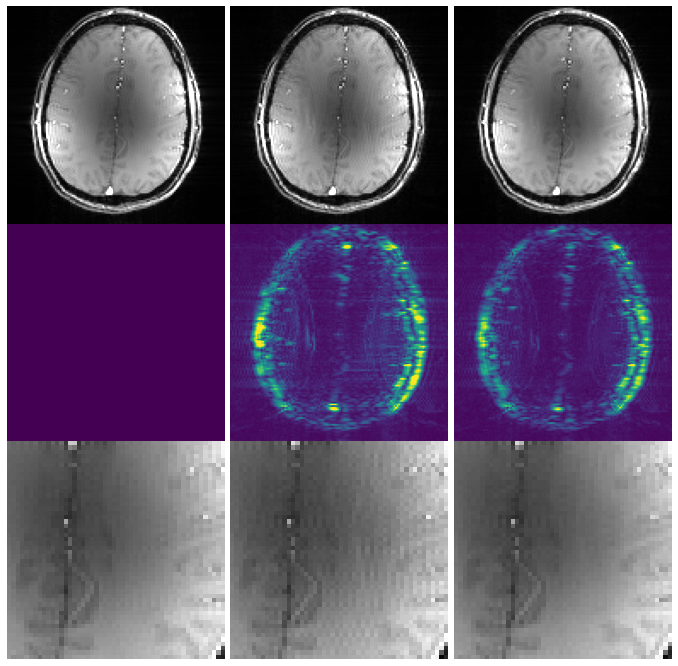

In [45]:
_, ax = plt.subplots(3,3, figsize=(12,12))

# ax[0,0].imshow(utils.sos(utils.ifftdim(pg, dims=(0,1))).T[::-1,:], vmin=0, vmax=2E-6, cmap='gray')
ax[0,0].imshow(utils.sos(utils.ifftdim(pg, dims=(0,1))).T[::-1,:], vmin=0, vmax=2E-6, cmap='gray')
# ax[0,0].set_title('Ground Truth')
ax[0,0].axis('off')
ax[0,1].imshow(utils.sos(utils.ifftdim(zz110[0], dims=(0,1))).T[::-1,:], vmin=0, vmax=2E-6, cmap='gray')
# ax[0,1].set_title('SLR-vcc')
ax[0,1].axis('off')
ax[0,2].imshow(utils.sos(utils.ifftdim(xx2_110[0], dims=(0,1))).T[::-1,:], vmin=0, vmax=2E-6, cmap='gray')
# ax[0,2].set_title('LSLR(2)-vcc')
ax[0,2].axis('off')
# ax[0,3].imshow(utils.sos(utils.ifftdim(c65[0], dims=(0,1))).T[::-1,:], vmin=0, vmax=2E-6, cmap='gray')
# ax[0,3].set_title('LSR-c')
# ax[0,3].axis('off')
# ax[0,4].imshow(utils.sos(utils.ifftdim(x2c_60[0], dims=(0,1))).T[::-1,:], vmin=0, vmax=2E-6, cmap='gray')
# ax[0,4].set_title('LSLR(2)-c')
# ax[0,4].axis('off')
ax[1,0].imshow(utils.sos(utils.ifftdim(pg-pg, dims=(0,1))).T[::-1,:], vmin=0, vmax=4.8*1E-7)
# ax[1,0].set_title('Ground Truth') 
ax[1,0].axis('off')
ax[1,1].imshow(utils.sos(utils.ifftdim(zz110[0]-pg, dims=(0,1))).T[::-1,:], vmin=0, vmax=4.8*1E-7)
# ax[1,1].set_title('SLR-vcc (x10)') 
ax[1,1].axis('off')
ax[1,2].imshow(utils.sos(utils.ifftdim(xx2_110[0]-pg, dims=(0,1))).T[::-1,:], vmin=0, vmax=4.8*1E-7)
# ax[1,2].set_title('LSLR(2)-vcc diff (x10)')
ax[1,2].axis('off')
# ax[1,3].imshow(utils.sos(utils.ifftdim(c65[0]-pg, dims=(0,1))).T[::-1,:], vmin=0, vmax=2E-7)
# ax[1,3].set_title('LSR-c (x10)') 
# ax[1,3].axis('off')
# ax[1,4].imshow(utils.sos(utils.ifftdim(x2c_60[0]-pg, dims=(0,1))).T[::-1,:], vmin=0, vmax=2E-7)
# ax[1,4].set_title('LSLR(2)-c diff (x10)')
# ax[1,4].axis('off')
ax[2,0].imshow(utils.sos(utils.ifftdim(pg, dims=(0,1))).T[80:30:-1,50:100], vmin=0, vmax=2E-6, cmap='gray')
# # ax[2,0].set_title('Ground Truth')
ax[2,0].axis('off')
ax[2,1].imshow(utils.sos(utils.ifftdim(zz110[0], dims=(0,1))).T[80:30:-1,50:100], vmin=0, vmax=2E-6, cmap='gray')
# # ax[2,1].set_title('LSR-vcc')
ax[2,1].axis('off')
ax[2,2].imshow(utils.sos(utils.ifftdim(xx2_110[0], dims=(0,1))).T[80:30:-1,50:100], vmin=0, vmax=2E-6, cmap='gray')
# # ax[2,2].set_title('LSLR(2)-vcc')
ax[2,2].axis('off')
# ax[2,3].imshow(utils.sos(utils.ifftdim(c65[0], dims=(0,1))).T[80:40:-1,60:100], vmin=0, vmax=2E-6, cmap='gray')
# ax[2,3].set_title('LSR-c')
# ax[2,3].axis('off')
# ax[2,4].imshow(utils.sos(utils.ifftdim(x2c_60[0], dims=(0,1))).T[80:40:-1,60:100], vmin=0, vmax=2E-6, cmap='gray')
# ax[2,4].set_title('LSLR(2)-c')
# ax[2,4].axis('off')
plt.rc('font', size=12)
plt.subplots_adjust(wspace=0,hspace=0)